In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

In [2]:
# Load an image
img = cv2.imread('./data/grid_output/grid_0_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

In [3]:
# Gaussian Filter
gaussian_filtered =  cv2.GaussianBlur(img, (5,5), 0)

In [4]:
# Apply Median Filter
median_filtered = cv2.medianBlur(img, 5)  # 5 is the kernel size

In [43]:
# Apply Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(img, 5, 150, 150)
bilateral_filtered2 = cv2.bilateralFilter(img, 5, 75, 75)

In [111]:
import numpy as np
from scipy.ndimage import uniform_filter

# Applies to grayscale only
def kuwahara_filter(img, window_size):
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    radius = window_size // 2 + 1
    subregion_diff = radius // 2
    padding = radius - 1
    rows, cols = img.shape[:2]
    pad_width = ((padding, padding), (padding, padding))
    padded = np.pad(img, pad_width, mode='reflect')
    
    result = np.zeros_like(img)

    means = uniform_filter(padded, size=radius+1, mode='constant', cval=0.0)
    sqr_means = uniform_filter(padded**2, size=radius+1, mode='constant', cval=0.0)
    variances = sqr_means - means**2

    offsets = [(subregion_diff, subregion_diff), 
               (-subregion_diff, subregion_diff), 
               (subregion_diff, -subregion_diff), 
               (-subregion_diff, -subregion_diff)]
    
    for r in range(padding, rows):
        for c in range(padding, cols):
            subregion_variances = [variances[r + dr, c + dc] for dr, dc in offsets]
            min_index = min(range(len(values)), key=subregion_variances.__getitem__)
            min_offset = offsets[min_index]
            kh_pixel = means[r + min_offset[0], c + min_offset[1]]
            result[r, c] = kh_pixel
            
        
        # temp_result = np.where(quadrant_variances < variances, quadrant_means, result)
        # result = np.where(quadrant_variances < variances, temp_result, result)
    
    return result[padding:-padding, padding:-padding].astype(np.uint8)

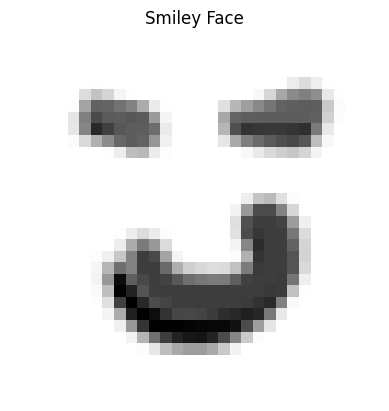

In [41]:
img = cv2.imread('./smiley_face.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers
plt.title('Smiley Face')
plt.show()

In [110]:
from pprint import pprint

radius = 1
window_size = 3

matrix = np.array([
    [[1, 2], [3, 4], [5, 6]],
    [[9, 10], [11, 12], [13, 14]],
    [[17, 18], [19, 20], [21, 22]]
])
matrix = matrix.reshape(3, 6)

pad_width = ((radius, radius), (radius, radius))
padded = np.pad(matrix, pad_width, mode='reflect')

result = np.zeros_like(matrix)

means = uniform_filter(padded, size=window_size, mode='constant', cval=0.0)
sqr_means = uniform_filter(padded**2, size=window_size, mode='constant', cval=0.0)
variances = sqr_means - means**2

subregion_diff = 1
offsets = [(subregion_diff, subregion_diff), 
           (-subregion_diff, subregion_diff), 
           (subregion_diff, -subregion_diff), 
           (-subregion_diff, -subregion_diff)]
values = [variances[1 + dy, 1 + dx] for dy, dx in offsets]

r = 1
c = 1
print(f"means: {means[r-1:r+2, c-1:c+2]}")  # 3x3 neighborhood
print(f"variances: {variances[r-1:r+2, c-1:c+2]}")  # 3x3 neighborhood
print(f"subregion_variances: {subregion_variances}")
print(f"min_index: {min_index}")
print(f"min_offset: {min_offset}")
print(f"kh_pixel: {kh_pixel}")
print(f"result[{r}, {c}]: {result[r, c]}")


#print(f"{padded}\n\n{means}\n\n{variances}\n")


#uniform_filter(padded, size=window_size, mode='constant', cval=0.0)
# print(padded[radius:-radius, radius:-radius])
# print(means)

means: [[ 2  3  3]
 [ 4  6  7]
 [ 6  9 10]]
variances: [[16 22 25]
 [24 27 19]
 [52 54 42]]
subregion_variances: [np.int64(42), np.int64(25), np.int64(52), np.int64(16)]
min_index: 3
min_offset: (-1, -1)
kh_pixel: 2
result[1, 1]: 0


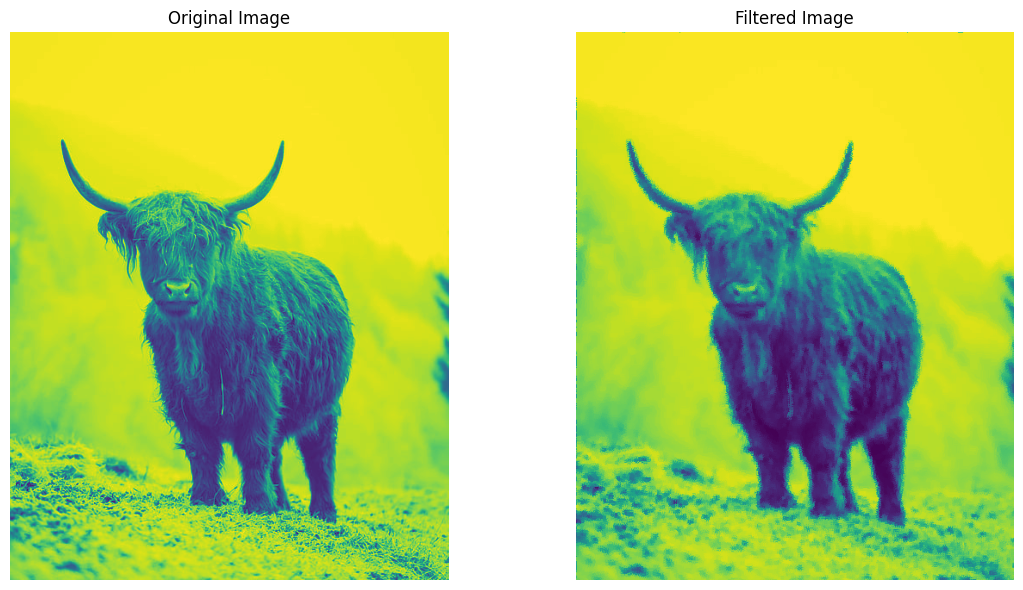

NameError: name 'x' is not defined

In [112]:
cattle_bgr = cv2.imread('./highland-cattle-8183107_640.jpg')
cattle = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cattle_blur = cv2.blur(cattle, (3,3))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cattle_kh = kuwahara_filter(cattle, 5)

# Display original image
ax1.imshow(cattle)
ax1.set_title('Original Image')
ax1.axis('off')

# Display blurred image
ax2.imshow(cattle_kh)
ax2.set_title('Filtered Image')
ax2.axis('off')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

print(cattle.shape)

In [92]:
# Apply Kuwahara Filter
kuwahara_filtered = kuwahara_filter(img, 5)

ValueError: operands could not be broadcast together with shapes (644,516,3) (3,3,1) 

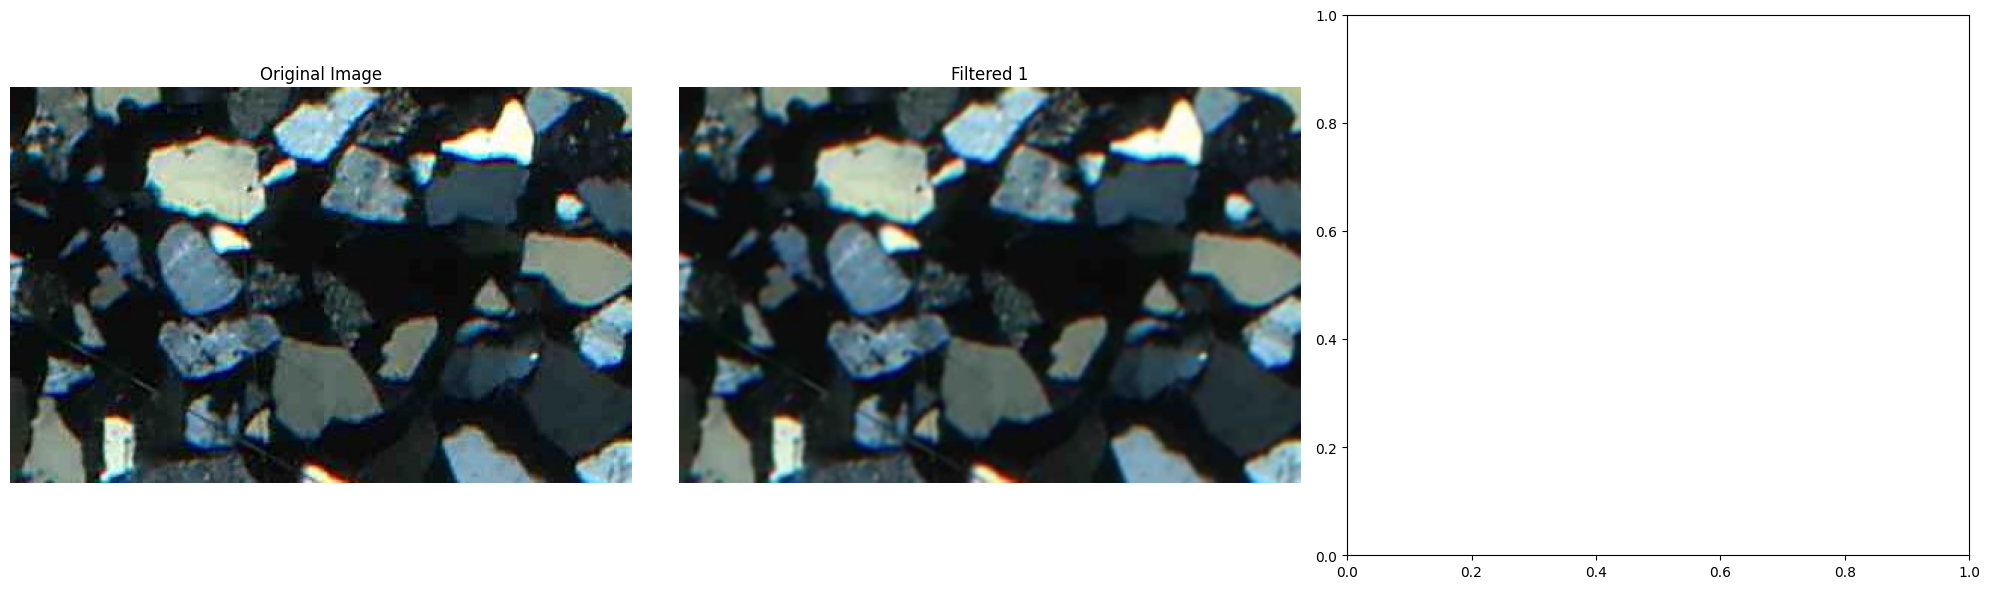

In [7]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Display original image
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display first filtered image
axes[1].imshow(gaussian_filtered)
axes[1].set_title('Filtered 1')
axes[1].axis('off')

# # Display second filtered image
# axes[2].imshow(kuwahara_filtered)
# axes[2].set_title('Filtered 2')
# axes[2].axis('off')

plt.tight_layout()
plt.show()

In [50]:
img.shape

(262, 412, 3)